In [159]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.preprocessing.text as tfkpt
from tensorflow.keras.preprocessing.text import Tokenizer
import csv

In [160]:
anime_source_train = pd.read_csv('./../assets/anime_genre.csv')

#### Above read data-anime for to train genre

In [161]:
print(f"Data Shape: {anime_source_train}")

Data Shape:        anime_id                                  title  \
0         11013                          Inu x Boku SS   
1          2104                       Seto no Hanayome   
2          5262                     Shugo Chara!! Doki   
3           721                          Princess Tutu   
4         12365                    Bakuman. 3rd Season   
...         ...                                    ...   
14469     26089             Gutchonpa Omoshiro Hanashi   
14470     21525                   Geba Geba Shou Time!   
14471     37897            Godzilla: Hoshi wo Kuu Mono   
14472     34193  Nippon Mukashibanashi: Sannen Netarou   
14473     37908             Senjou no Valkyria Special   

                   title_english                  title_japanese  \
0      Inu X Boku Secret Service                          妖狐×僕SS   
1          My Bride is a Mermaid                           瀬戸の花嫁   
2             Shugo Chara!! Doki                     しゅごキャラ！！どきっ   
3                  

In [162]:
print(anime_source_train.columns)

Index(['anime_id', 'title', 'title_english', 'title_japanese',
       'title_synonyms', 'image_url', 'type', 'source', 'episodes', 'status',
       'airing', 'aired_string', 'aired', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites', 'background',
       'premiered', 'broadcast', 'related', 'producer', 'licensor', 'studio',
       'genre', 'opening_theme', 'ending_theme'],
      dtype='object')


In [163]:
ranked_anime_source = anime_source_train[['source', 'score']].sort_values(by='score')

In [164]:
ranked_anime_source

,source,score
14286,Other,0.00
5344,Original,0.00
11127,Original,0.00
1702,Manga,0.00
6215,Manga,0.00
...,...,...
14399,Other,9.52
14463,Other,10.00
548,Original,10.00
14403,Original,10.00


In [165]:
ranked_anime_source['score'].median()

6.37

In [166]:
ranked_anime_source['score'].mode()

0    0.0
dtype: float64

In [167]:
ranked_anime_source['score'].mean()

6.144179217907974

#### Mean and Median Score is very close to lowest score so we use regression 

In [168]:
regression_anime_source = ranked_anime_source['score'].value_counts()

In [169]:
ra_source = ranked_anime_source.groupby(['score'],as_index=False).count()
ra_source

,score,source
0,0.00,350
1,1.00,11
2,1.25,1
3,1.33,1
4,1.50,1
...,...,...
625,9.20,1
626,9.25,1
627,9.50,2
628,9.52,1


#### math calculation of positive, negative and natural range

In [170]:
range = 1000 - 0
range

1000

In [171]:
round(range/3)

333

#### Math calculation says use 0.59 for each situation.
#### We check it as below analysis

In [172]:
ra_source = ra_source.rename(columns={'score': 'points', 'source': 'count'})

In [173]:
ra_source

,points,count
0,0.00,350
1,1.00,11
2,1.25,1
3,1.33,1
4,1.50,1
...,...,...
625,9.20,1
626,9.25,1
627,9.50,2
628,9.52,1


In [174]:
X = ra_source['points'].values
y = ra_source['count'].values
X

array([ 0.  ,  1.  ,  1.25,  1.33,  1.5 ,  1.67,  1.75,  1.88,  1.9 ,
        2.  ,  2.08,  2.25,  2.27,  2.33,  2.38,  2.4 ,  2.44,  2.5 ,
        2.52,  2.55,  2.57,  2.6 ,  2.61,  2.63,  2.64,  2.65,  2.66,
        2.67,  2.71,  2.72,  2.75,  2.78,  2.8 ,  2.82,  2.85,  2.86,
        2.88,  2.89,  2.9 ,  2.91,  2.92,  2.95,  3.  ,  3.04,  3.07,
        3.08,  3.09,  3.1 ,  3.11,  3.12,  3.13,  3.14,  3.15,  3.16,
        3.17,  3.19,  3.2 ,  3.21,  3.22,  3.23,  3.24,  3.25,  3.26,
        3.27,  3.29,  3.3 ,  3.31,  3.33,  3.34,  3.35,  3.36,  3.38,
        3.39,  3.4 ,  3.42,  3.43,  3.44,  3.45,  3.46,  3.47,  3.48,
        3.49,  3.5 ,  3.51,  3.52,  3.53,  3.54,  3.55,  3.56,  3.57,
        3.58,  3.59,  3.6 ,  3.61,  3.62,  3.63,  3.64,  3.65,  3.66,
        3.67,  3.68,  3.69,  3.7 ,  3.71,  3.72,  3.73,  3.74,  3.75,
        3.76,  3.77,  3.78,  3.79,  3.8 ,  3.81,  3.82,  3.83,  3.85,
        3.86,  3.87,  3.88,  3.89,  3.9 ,  3.91,  3.92,  3.93,  3.94,
        3.95,  3.96,

In [175]:
X=X.reshape(-1,1)
X

array([[ 0.  ],
       [ 1.  ],
       [ 1.25],
       [ 1.33],
       [ 1.5 ],
       [ 1.67],
       [ 1.75],
       [ 1.88],
       [ 1.9 ],
       [ 2.  ],
       [ 2.08],
       [ 2.25],
       [ 2.27],
       [ 2.33],
       [ 2.38],
       [ 2.4 ],
       [ 2.44],
       [ 2.5 ],
       [ 2.52],
       [ 2.55],
       [ 2.57],
       [ 2.6 ],
       [ 2.61],
       [ 2.63],
       [ 2.64],
       [ 2.65],
       [ 2.66],
       [ 2.67],
       [ 2.71],
       [ 2.72],
       [ 2.75],
       [ 2.78],
       [ 2.8 ],
       [ 2.82],
       [ 2.85],
       [ 2.86],
       [ 2.88],
       [ 2.89],
       [ 2.9 ],
       [ 2.91],
       [ 2.92],
       [ 2.95],
       [ 3.  ],
       [ 3.04],
       [ 3.07],
       [ 3.08],
       [ 3.09],
       [ 3.1 ],
       [ 3.11],
       [ 3.12],
       [ 3.13],
       [ 3.14],
       [ 3.15],
       [ 3.16],
       [ 3.17],
       [ 3.19],
       [ 3.2 ],
       [ 3.21],
       [ 3.22],
       [ 3.23],
       [ 3.24],
       [ 3.25],
       [

In [176]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [177]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=10)
print(f"X_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print(f"X_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print(y_test)

X_train shape (504, 1)
y_train shape (504,)
X_test shape (126, 1)
y_test shape (126,)
[19 35 56 14  1  3  6 25 30 61 11 13  1  1 59 43 56  1 25 65 54 26  5 62
 46 28 43 52 17 28 22 25 52 28 11  2 25  3 54 42 25 60  1 31 23  8 41  5
 12  1 30 40 36  9  1 44  1  6  1 32 25 14  9 37 47 11 26 47 41  7 37 28
  1 49 20 63  4 14  5 50  1  2 15 41 10 21 41  1  1 60 24 55 51  1  1 32
  1 38 38 27  6  5  3 40 10  8 29 41  2 39 31  4 16 14 15 26 45  1  7  1
  2 26 41 33  5  3]


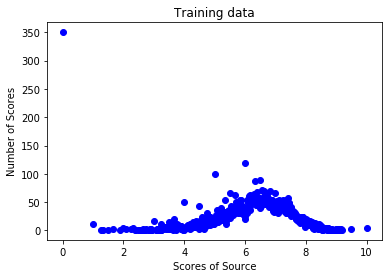

In [178]:
%matplotlib inline
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('Scores of Source' )
plt.ylabel('Number of Scores')
plt.title('Training data')
plt.show()

In [179]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
print(f"Train accuracy {round(lm.score(x_train,y_train)*100,2)} %")
print(f"Test accuracy {round(lm.score(x_test,y_test)*100,2)} %")

Train accuracy 1.35 %
Test accuracy 10.51 %


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

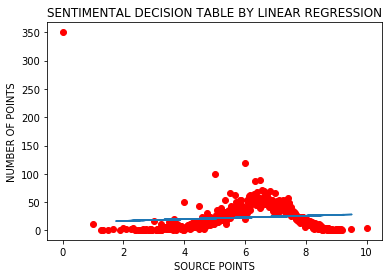

In [180]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("SOURCE POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY LINEAR REGRESSION")
plt.plot

#### We check it with Polynominal Regression

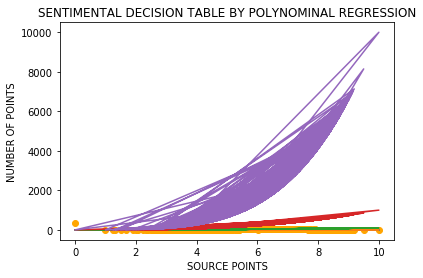

In [181]:
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x_train)
poly.fit(X_poly,y_train)
%matplotlib inline
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_train, poly.fit_transform(x_train))
plt.xlabel("SOURCE POINTS")
plt.ylabel("NUMBER OF POINTS")
plt.title("SENTIMENTAL DECISION TABLE BY POLYNOMINAL REGRESSION")
plt.show()

In [182]:
def create_sentiment(int):
    if int >=0 and int<4.50:
        return 0
    if int>=4.50 and int<7.75:
        return 1
    if int>=7.75 and int<10.01:
        return 2

### Above the decision of breakpoints are given 

In [183]:
ranked_anime_source['sentiment'] = ranked_anime_source['score'].apply(create_sentiment)

In [184]:
ranked_anime_source

,source,score,sentiment
14286,Other,0.00,0
5344,Original,0.00,0
11127,Original,0.00,0
1702,Manga,0.00,0
6215,Manga,0.00,0
...,...,...,...
14399,Other,9.52,2
14463,Other,10.00,2
548,Original,10.00,2
14403,Original,10.00,2


In [185]:
def clean_comas(input):
    input = str(input)
    return input.replace(',', ';') 

In [186]:
ranked_anime_source['source'] = ranked_anime_source['source'].apply(clean_comas)

In [187]:
ranked_anime_source

,source,score,sentiment
14286,Other,0.00,0
5344,Original,0.00,0
11127,Original,0.00,0
1702,Manga,0.00,0
6215,Manga,0.00,0
...,...,...,...
14399,Other,9.52,2
14463,Other,10.00,2
548,Original,10.00,2
14403,Original,10.00,2


In [188]:
ranked_anime_source.to_csv('ranked_anime_source.csv')

In [189]:
source_df = pd.read_csv('ranked_anime_source.csv')

In [190]:
source_df

,Unnamed: 0,source,score,sentiment
0,14286,Other,0.00,0
1,5344,Original,0.00,0
2,11127,Original,0.00,0
3,1702,Manga,0.00,0
4,6215,Manga,0.00,0
...,...,...,...,...
14469,14399,Other,9.52,2
14470,14463,Other,10.00,2
14471,548,Original,10.00,2
14472,14403,Original,10.00,2


In [191]:
source_df.columns=['Unnamed: 0', 'source' , 'score' , 'sentiment']
source_training_df = source_df[['source', 'sentiment']].dropna()
source_training_df.sample(5)

,source,sentiment
12121,Visual novel,1
2691,Unknown,1
14418,Light novel,2
8081,Light novel,1
4676,Unknown,1


In [192]:
source_y = source_training_df.sentiment
print(source_y)

0        0
1        0
2        0
3        0
4        0
        ..
14469    2
14470    2
14471    2
14472    2
14473    2
Name: sentiment, Length: 14474, dtype: int64


In [193]:
source_x = source_training_df.source
print(source_x)

0           Other
1        Original
2        Original
3           Manga
4           Manga
           ...   
14469       Other
14470       Other
14471    Original
14472    Original
14473    Original
Name: source, Length: 14474, dtype: object


In [194]:
source_training_df.describe()

,sentiment
count,14474.000000
mean,0.987426
std,0.398792
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [195]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(source_x)

In [196]:
source_x = tokenizer.texts_to_sequences(source_x)

In [197]:
source_x = tokenizer.sequences_to_matrix(source_x)
source_x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [198]:
print(type(source_x))

<class 'numpy.ndarray'>


In [199]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
import json

In [200]:
print ("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0


In [201]:
source_y = keras.utils.to_categorical(source_y,3)

In [202]:
source_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

#### x and y axis created for machine learning, now it is time for layers between input and output

In [203]:
model = Sequential()

#### 1st layer act Sigmoid drop 1 at 10%

In [204]:
model.add(Dense(955, activation='sigmoid'))
model.add(Dropout(0.1))

#### 2nd layer act Rectified Linear Drop 1 at 20%

In [205]:
model.add(Dense(555, activation = 'relu'))
model.add(Dropout(0.2))

#### 3rd layer act Linear Drop 1 at 40%

In [206]:
model.add(Dense(333, activation = 'linear'))
model.add(Dropout(0.40))

#### 4th layer act softsign no drop

In [207]:
model.add(Dense(33, activation = 'softsign'))


#### 5th layer act softmax no drop

In [208]:
model.add(Dense(3, activation = 'softmax'))

#### Compile the model

In [209]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [210]:
model.fit(
    source_x, source_y,
    batch_size=35,
    epochs=7,
    verbose=1,
    validation_split=0.2)

Train on 11579 samples, validate on 2895 samples
Epoch 1/7
11579/11579 [==============================] - 3s 248us/sample - loss: 0.3480 - accuracy: 0.8902 - val_loss: 3.2087 - val_accuracy: 0.6335
Epoch 2/7
11579/11579 [==============================] - 2s 196us/sample - loss: 0.3426 - accuracy: 0.8927 - val_loss: 3.2352 - val_accuracy: 0.6335
Epoch 3/7
11579/11579 [==============================] - 2s 199us/sample - loss: 0.3422 - accuracy: 0.8927 - val_loss: 3.5144 - val_accuracy: 0.6335
Epoch 4/7
11579/11579 [==============================] - 2s 203us/sample - loss: 0.3417 - accuracy: 0.8927 - val_loss: 3.7678 - val_accuracy: 0.6335
Epoch 5/7
11579/11579 [==============================] - 2s 201us/sample - loss: 0.3417 - accuracy: 0.8927 - val_loss: 3.9472 - val_accuracy: 0.6335
Epoch 6/7
11579/11579 [==============================] - 2s 210us/sample - loss: 0.3417 - accuracy: 0.8927 - val_loss: 4.0889 - val_accuracy: 0.6335
Epoch 7/7
11579/11579 [==============================] - 

In [211]:
anime_source_model = model.to_json()
with open('anime_source_model_1.json', 'w') as json_file:
    json_file.write(anime_source_model)
model.save_weights('anime_source_model_1.h5')

In [212]:
anime_source_dict_1 = tokenizer.word_index
with open('anime_source_dict_1.json', 'w') as d:
    json.dump(anime_source_dict_1, d)